<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

# Homework 3 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

In [1]:
# Run this cell to set up your notebook

import numpy as np
from scipy import stats
from scipy import special
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Aces and Face Cards ##
A standard deck consists of 52 cards of which 4 are aces, 4 are kings, and 12 (including the four kings) are "face cards" (Jacks, Queens, and Kings).

Cards are dealt at random without replacement from a standard deck till all the cards have been dealt. 

Find the expectation of the following. Each can be done with almost no calculation if you use symmetry. 

**a)** The number of aces among the first 5 cards

**b)** The number of face cards that *do not* appear among the first 13 cards

**c)** The number of aces among the first 5 cards minus the number of kings among the last 5 cards

**d)** The number of cards before the first ace 

**e)** The number of cards strictly in between the first ace and the last ace

**f)** The number of face cards before the first ace

## 2. Phone Calls ##
In an hour, a student receives $X$ phone calls from people he knows and $Y$ phone calls from people he doesn't know. Assume that $X$ has the Poisson $(\lambda)$ distribution and $Y$ has the Poisson $(\mu)$ distribution. Also assume that $X$ and $Y$ are independent. Finally, assume that each call has chance 0.1 of being missed by the student, independently of all other calls.

**a)** Fill in the blank with the name of a distribution and its parameter or parameters:

The total number of calls that the student receives has the $\underline{~~~~~~~~~~~~}$ distribution.

**b)** Fill in the blank with the name of a distribution and its parameter or parameters:

Given that the student receives a total of $k$ calls, the conditional distribution of the total number of missed calls is $\underline{~~~~~~~~~~~~}$.

**c)** Fill in the blank with the name of a distribution and its parameter or parameters:

The total number of missed calls has the $\underline{~~~~~~~~~~~~}$ distribution.

**d)** For non-negative integer $n$, find the chance that the student misses at most $n$ calls from people he knows.

**e)** Let $n$ and $m$ be non-negative integers. Find the chance that the student misses at most $n$ calls from people he knows and also misses at least $m$ calls from people he doesn't know. Don't leave infinite sums in your answer.

## 3. Unbiased Estimators ##

**a)** A population of known size $N$ contains an unknown number $G$ of good elements. Let $X$ be the number of good elements in a simple random sample of size $n$ drawn from this population. Use $X$ to construct an unbiased estimator of $G$.

See the example in Section 8.2 for a refresher: http://prob140.org/textbook/chapters/Chapter_08/02_Additivity

**b)** Would your answer to Part **a)** have been different if $X$ had been the number of good elements in a random sample drawn with replacement from the population? Why or why not?

**c)** A flattened die lands 1 and 6 with chance $p/2$ each, and the other faces 2, 3, 4, and 5 with chance $(1-p)/4$ each. Here $p \in (0, 1)$ is an unknown number. Let $X_1, X_2, \ldots, X_n$ be the results of $n$ rolls of this die. First find $E(\vert X_1 - 3.5 \vert)$, and use the answer to construct an unbiased estimator of $p$ based on all of $X_1, X_2, \ldots, X_n$.

## 4. Classification ##
In a population of four classes of individuals, the proportion of individuals of Class $i$ is $p_i$ for $i = 1, 2, 3, 4$. Suppose you sample independently from this population, and suppose the sample size is a Poisson random variable with parameter $n$ for a fixed positive integer $n$. 

**a)** What is the probability that the sample contains at least one individual from each class?

**b)** Let $p_i = \frac{i}{10}$ for $i = 1, 2, 3, 4$. Plot a graph of your answer as a function of $n$ for $n$ in the range 1 through 60. For an example of a calculation of probabilities accompanied by a plot, see Section 1.4 of the text.

**c)** Still assuming $p_i = \frac{i}{10}$ for $i = 1, 2, 3, 4$, find a decimal value for the chance that you get at least two of each kind of individual if the parameter is $n = 50$.

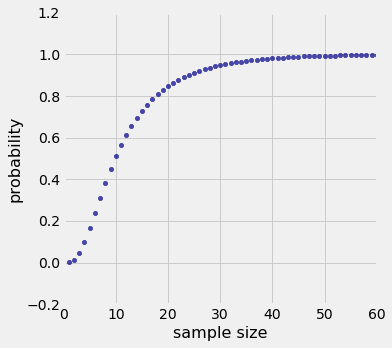

In [10]:
#Answer to 4b

def p_at_least_one(n):
    prob = np.arange(1, 5) / 10
    return np.prod(1 - stats.poisson.pmf(0, prob * n))
k = np.arange(1, 61)
results = Table().with_column('sample size', k)
probs = results.apply(p_at_least_one, 0)
results = results.with_column('probability', probs)

results.scatter('sample size', 'probability')
plt.xlim(0, 60)
plt.ylim(-0.2, 1.2);

In [11]:
#Answer for 4c
pb = np.arange(1, 5) / 10
np.prod(1 - stats.poisson.cdf(1, pb * 50))

0.9590883725969347

## 5. Geometric Distribution ##
Consider an infinite sequence of i.i.d. Bernoulli $(p)$ trials, where $0 < p < 1$. To make the problem more concrete, imagine rolling a die over and over again and keeping track of whether or not you see the face with six spots; but solve the problem for a general $p$.

Let $T$ be the index of the first trial that results in a success. Then the possible values of $T$ are $1, 2, 3, \ldots $. In the case of rolling a die till you see a six, if the rolls come out $2,3,3,4,6$ then the value of $T$ is 5.

**a)** Let $q = 1-p$. Explain why $P(T = k) = q^{k-1}p$ for $k \ge 1$. This is called the *geometric distribution with parameter $p$ on $\{1, 2, 3, \ldots \}$*.

**b)** For a positive integer $k$, let $N_k$ be the number of successes in trials 1 through $k$. Fill in the blank in the identity below and explain your choice.

$$
P(T > k) = P(N_k = \underline{ ~~~~~~~~~~~~~ })
$$

**c)** Use **(b)** to find $P(T > k)$ with no calculation.

**d)** Use **(c)** and the tail sum formula used in Lab 3 to show that $E(T) = 1/p$.

## 6. Collecting Distinct Values ##
This problem is a workout in finding expectations by using all the tools at your disposal. Some of them have been developed in this homework. If an answer doesn't appear to fit into a formula that has already been proven, it's a very good idea to try to write the variable as a sum of simpler variables.

**a)** A fair die is rolled $n$ times. Find the expected number of times the face with six spots appears.

**b)** A fair die is rolled $n$ times. Find the expected number of faces that *do not* appear, and say what happens to this expectation as $n$ increases.

**c)** Use your answer to **(b)** to find the expected number of distinct faces that *do* appear in $n$ rolls of a die.

**d)** Find the expected number of times you have to roll a die till you have seen all of the faces. This is a version of what is known as the *coupon collector's problem*.


## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Run the cell below to generate a PDF file.
* Download the PDF file and confirm that none of your work is missing or cut off.  If the link leads you to a blank page, use [Command]+[S] or [Ctrl]+[S] to download your work.  

### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.  
* Submit the assignment to Homework3 on Gradescope.
* **Make sure to assign each page of your pdf to the correct question.**


### **We will not grade assignments which do not have pages selected for each question or were submitted after the deadline.** 

In [1]:
import gsExport
gsExport.generateSubmission("Homework_03.ipynb")

Processing Homework_03.ipynb
Generated notebook and autograded
Attempting to compile LaTeX
Finished generating PDF
